# Report generation

In the last notebook of the feature engeneering process the analysis will be performed and a report containing the results will be automatically generated in PDF format. 

## Analysis objectives

Recall, from the [Problem statement in notebook 1](), we want to know:

* Which genres are highest rated

* Which video games platforms have the highes rated games 

* Which platform families have the highest rated games

Now we have cleaned data and clear goals, so let's get started.

## Importing dependencies

In [1]:
import pandas as pd # To handle data
# To build plots
import seaborn as sns 
import matplotlib.pyplot as plt
# To interact with file manager
import os
# To generate pdf report
from fpdf import FPDF
from datetime import date

# To prettify our pandas dataframe prints
pd.set_option('expand_frame_repr', False)
pd.set_option("display.max_rows", None, "display.max_columns", None)

## Creating report folder

In [2]:
# Creating the report folder if it does not exists
report_folder = './report'
report_imgs_folder = f'{report_folder}/imgs'
if not os.path.exists(report_imgs_folder):
    os.makedirs(report_imgs_folder)

## Loading data

In [3]:
# Games and platforms csv are loaded
games_df = pd.read_csv('./cleaned_data/games.zip')
platforms_df = pd.read_csv('./cleaned_data/platforms.zip')

## Getting best rated genres

Each video game may have been associated with many platforms, categories, game modes, and of course, several genres. To anwser this question we just need the genres associated with each video game, for this reason, the dataframe will be grouped by name and genre. 

In [4]:
games_by_genre = games_df.groupby(
    ['name', 
     'genre', 
     'total_rating'
    ]
).size().to_frame().reset_index().iloc[:,:-1]
games_by_genre.head(10)

,name,genre,total_rating
0,! That Bastard Is Trying To Steal Our Gold !,Adventure,50.000000
1,! That Bastard Is Trying To Steal Our Gold !,Indie,50.000000
2,"""TWO DRAW""",Indie,70.000000
3,"""TWO DRAW""",Strategy,70.000000
4,#Archery,Indie,50.000000
5,#Archery,Sport,50.000000
6,#Breakforcist Battle,Arcade,63.000000
7,#Breakforcist Battle,Indie,63.000000
8,#Breakforcist Battle,Puzzle,63.000000
9,#IDARB,Indie,78.136889


Then, we can easily compute total rating mean for each group

In [5]:
mean_rating_by_genre = games_by_genre.groupby(
    ['genre'])['total_rating'].mean().sort_values(
    ascending=False).to_frame().reset_index()
mean_rating_by_genre.columns = ['genre', 'ratings_mean']
mean_rating_by_genre

,genre,ratings_mean
0,Tactical,72.294568
1,Visual Novel,70.988039
2,Turn-based strategy (TBS),70.964719
3,Arcade,70.351953
4,Point-and-click,70.344439
5,Music,69.819280
6,Platform,69.607877
7,Puzzle,69.536535
8,Real Time Strategy (RTS),68.977998
9,Hack and slash/Beat 'em up,68.744035


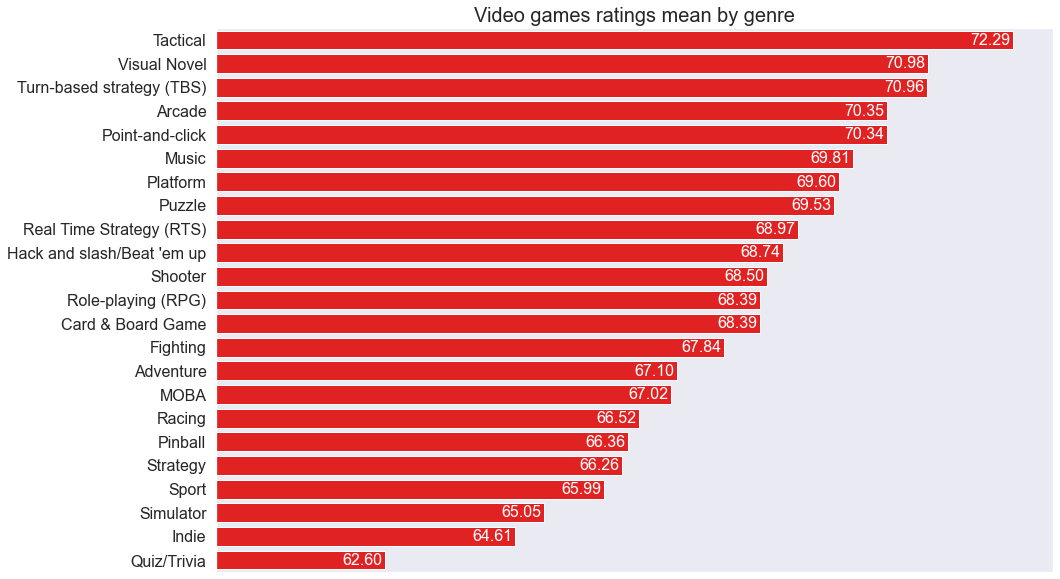

In [6]:
genres_color = (255/255, 3/255, 3/255, 0.78)

sns.set(rc = {'figure.figsize':(15,10)})
sns.set_style("dark")
sns.set_theme()

# Barplot
aux = mean_rating_by_genre.copy()

offset = 60
max_val = int(aux.ratings_mean.max())

aux.ratings_mean = aux.ratings_mean - offset

video_games_ratings_mean_by_genre = sns.barplot(
    data=aux, 
    x='ratings_mean',
    y='genre',
    color=genres_color,
    orient = 'h'
)
video_games_ratings_mean_by_genre.set_title(
    "Video games ratings mean by genre", 
    fontsize = 20
)
video_games_ratings_mean_by_genre.set_xlabel("")
video_games_ratings_mean_by_genre.set_ylabel("")
video_games_ratings_mean_by_genre.set_xticks([])
video_games_ratings_mean_by_genre.set_yticklabels(
    video_games_ratings_mean_by_genre.yaxis.get_ticklabels(),
    size=16
)


# Adding actual value to each bar
for i in range(len(aux)):
    value = mean_rating_by_genre.iloc[i,1]
    video_games_ratings_mean_by_genre.text(value-offset-.35, 
                                           i+.20, 
                                           f'{str(value)[:5]}', 
                                           color='white', 
                                           ha="center", 
                                           fontsize=16)

plt.savefig(f'{report_imgs_folder}/video_games_ratings_mean_by_genre.png', 
            bbox_inches='tight')
plt.show()


Another way to know if a video game genre is well recieved is counting their high ratings rate which is very important but also is vanished when computing the mean. We will assume a good rating is greater than or equal to 80.

First, we will get a dataframe containing all ratings for all genres

In [7]:
high_rating_threshold = 80

In [8]:
genre_and_rating = games_by_genre.groupby(
    ['genre', 
     'total_rating'
    ]).size().to_frame().reset_index()
ratings_by_genre = genre_and_rating.loc[
    genre_and_rating.index.repeat(genre_and_rating[0])
].reset_index(drop=True).iloc[:,:-1]
ratings_by_genre.head()

,genre,total_rating
0,Adventure,0.0
1,Adventure,0.0
2,Adventure,0.0
3,Adventure,0.0
4,Adventure,0.0


Then we need to get the number of total ratings by genre as well as the number of high reviews for each genre

In [9]:
total_ratings_by_genre = ratings_by_genre.groupby(
    'genre'
).size().to_frame().reset_index()
total_ratings_by_genre.columns = ['genre', 'n_total_ratings']
total_ratings_by_genre.head()

,genre,n_total_ratings
0,Adventure,11611
1,Arcade,2565
2,Card & Board Game,303
3,Fighting,1286
4,Hack and slash/Beat 'em up,1070


In [10]:
high_ratings_by_genre = ratings_by_genre[
    ratings_by_genre.total_rating >= high_rating_threshold
].groupby('genre').size().to_frame().reset_index()
high_ratings_by_genre.columns = ['genre', 'n_high_ratings']
high_ratings_by_genre.head()

,genre,n_high_ratings
0,Adventure,2353
1,Arcade,704
2,Card & Board Game,61
3,Fighting,243
4,Hack and slash/Beat 'em up,224


Then, we will join both results in a single dataframe

In [11]:
genre_ratings_df = pd.merge(total_ratings_by_genre, 
                            high_ratings_by_genre, on='genre')
genre_ratings_df.head()

,genre,n_total_ratings,n_high_ratings
0,Adventure,11611,2353
1,Arcade,2565,704
2,Card & Board Game,303,61
3,Fighting,1286,243
4,Hack and slash/Beat 'em up,1070,224


In [12]:
genre_ratings_df['high_ratings_rate']=genre_ratings_df.n_high_ratings*100/genre_ratings_df.n_total_ratings
genre_ratings_df = genre_ratings_df.sort_values('high_ratings_rate', 
                                                ascending=False)
genre_ratings_df.head()

,genre,n_total_ratings,n_high_ratings,high_ratings_rate
21,Turn-based strategy (TBS),924,301,32.575758
20,Tactical,713,230,32.258065
22,Visual Novel,569,168,29.525483
7,Music,559,162,28.980322
1,Arcade,2565,704,27.446394


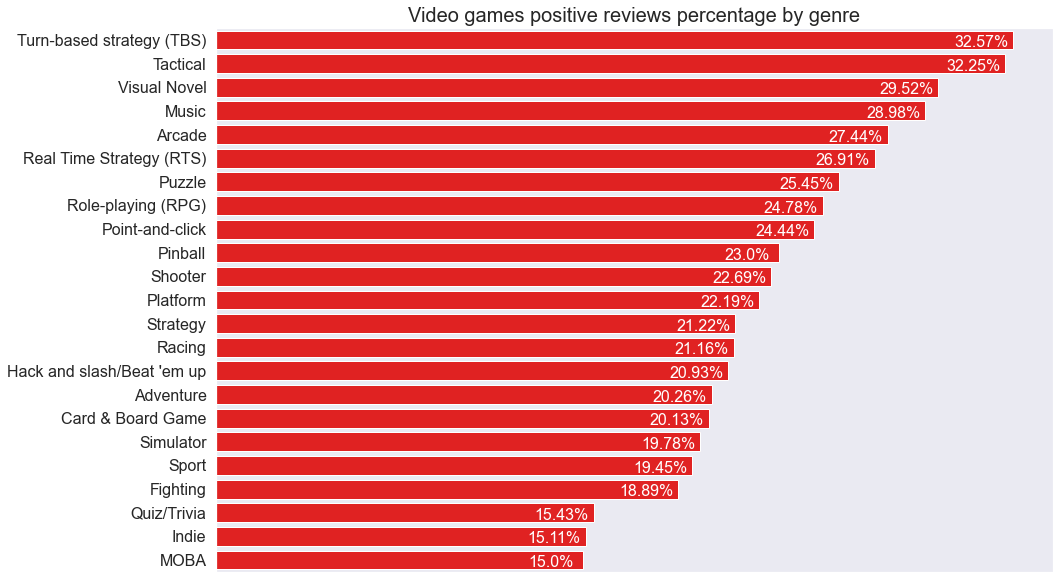

In [13]:
sns.set(rc = {'figure.figsize':(15,10)})
sns.set_style("dark")
sns.set_theme()

vg_positive_reviews_percentage = sns.barplot(
    data=genre_ratings_df, 
    x='high_ratings_rate',
    y='genre',
    color=genres_color,
    orient = 'h'
)

vg_positive_reviews_percentage.set_title(
    "Video games positive reviews percentage by genre", 
    fontsize = 20
)
vg_positive_reviews_percentage.set_xlabel("")
vg_positive_reviews_percentage.set_ylabel("")
vg_positive_reviews_percentage.set_xticks([])
vg_positive_reviews_percentage.set_yticklabels(
    vg_positive_reviews_percentage.yaxis.get_ticklabels(), 
    size = 16
)

# Adding actual value to each bar
for i in range(len(genre_ratings_df)):
    value = genre_ratings_df.iloc[i,3]
    vg_positive_reviews_percentage.text(value-1.3, 
                                        i+.3, 
                                        f'{str(value)[:5]}%', 
                                        color='white', 
                                        ha="center", 
                                        fontsize=16
                                       )
    
plt.savefig(
    f'{report_imgs_folder}/video_games_positive_reviews_percentage_by_genre.png', 
    bbox_inches='tight')
plt.show()

## Getting best rated consoles

In [14]:
games_df.head()

,id,name,platform,release_date,genre,category,game_modes,total_rating
0,2603,Battle Chess,PC (Microsoft Windows),1988-10-01,Strategy,main_game,Single player,71.97295
1,2603,Battle Chess,PC (Microsoft Windows),1988-10-01,Strategy,main_game,Multiplayer,71.97295
2,2603,Battle Chess,PC (Microsoft Windows),1988-10-01,Card & Board Game,main_game,Single player,71.97295
3,2603,Battle Chess,PC (Microsoft Windows),1988-10-01,Card & Board Game,main_game,Multiplayer,71.97295
4,2603,Battle Chess,PC DOS,1988-10-01,Strategy,main_game,Single player,71.97295


First, we need to group games dataframe by name and platform to get all unique releases for all platforms

In [15]:
games_by_platform = games_df.groupby(
    ['name', 
     'platform', 
     'total_rating']
).size().to_frame().reset_index().iloc[:,:-1]
games_by_platform.head(10)

,name,platform,total_rating
0,! That Bastard Is Trying To Steal Our Gold !,Linux,50.000000
1,! That Bastard Is Trying To Steal Our Gold !,PC (Microsoft Windows),50.000000
2,"""TWO DRAW""",PC (Microsoft Windows),70.000000
3,#Archery,PC (Microsoft Windows),50.000000
4,#Breakforcist Battle,Nintendo Switch,63.000000
5,#IDARB,Xbox One,78.136889
6,#KILLALLZOMBIES,Nintendo Switch,67.500000
7,#KILLALLZOMBIES,PC (Microsoft Windows),67.500000
8,#KILLALLZOMBIES,PlayStation 3,67.500000
9,#KILLALLZOMBIES,PlayStation 4,67.500000


Since there are platforms with very few reviews, we will only consider those which have at least 100. 

In [16]:
games_per_platform = games_by_platform.groupby(
    'platform'
).size().to_frame().reset_index()
games_per_platform.columns = ['platform', 'n_reviews']
games_per_platform = games_per_platform[games_per_platform.n_reviews >= 100]
games_per_platform.head()

,platform,n_reviews
6,Amiga,434
8,Amstrad CPC,239
10,Android,1571
11,Apple II,138
13,Arcade,608


Using the latter dataframe we can filter out platforms with few reviewed games

In [17]:
games_by_platform = games_by_platform[
    games_by_platform.platform.isin(games_per_platform.platform)
]

Then, we just compute the ratings mean for each platform

In [18]:
mean_rating_by_platform = games_by_platform.groupby(
    ['platform']
)['total_rating'].mean().sort_values(ascending=False)
mean_rating_by_platform = mean_rating_by_platform.to_frame().reset_index()
mean_rating_by_platform.columns = ['platform', 'ratings_mean']
mean_rating_by_platform.head()

,platform,ratings_mean
0,Google Stadia,75.117098
1,Super Famicom,74.374579
2,Xbox Series X|S,74.121629
3,iOS,73.852435
4,PlayStation 5,73.614184


Again, we can compute the high reviews rate for each platform. First we will obtain all ratings for all platforms

In [19]:
platform_and_rating = games_by_platform.groupby(
    ['platform', 
     'total_rating']
).size().to_frame().reset_index()
ratings_by_platform = platform_and_rating.loc[
    platform_and_rating.index.repeat(platform_and_rating[0])
].reset_index(drop=True).iloc[:,:-1]

Now, high reviews will be filtered and will be counted for each platform

In [20]:
high_ratings_by_platform = ratings_by_platform[
    ratings_by_platform.total_rating >= high_rating_threshold
].groupby('platform').size().to_frame().reset_index()
high_ratings_by_platform.columns = ['platform', 'n_high_ratings']

Then, we will use `games_per_platform` dataframe which already contains the total reviews for each platform and it will be merged with highest reviews dataframe

In [21]:
total_ratings_by_platform = games_per_platform.copy()
total_ratings_by_platform.columns = ['platform', 'n_total_ratings']

platforms_ratings_df = pd.merge(total_ratings_by_platform, 
                                high_ratings_by_platform, on='platform')
platforms_ratings_df.head()

,platform,n_total_ratings,n_high_ratings
0,Amiga,434,116
1,Amstrad CPC,239,58
2,Android,1571,427
3,Apple II,138,28
4,Arcade,608,116


Now, high ratings rate will be computed

In [22]:
platforms_ratings_df['high_ratings_rate']=platforms_ratings_df.n_high_ratings*100/platforms_ratings_df.n_total_ratings 
platforms_ratings_df = platforms_ratings_df.sort_values(
    'high_ratings_rate',
    ascending=False
)
platforms_ratings_df.head(20)

,platform,n_total_ratings,n_high_ratings,high_ratings_rate
51,iOS,3054,1310,42.894565
31,PlayStation 5,400,143,35.750000
49,Xbox Series X|S,356,119,33.426966
12,Google Stadia,237,78,32.911392
40,Super Famicom,113,37,32.743363
26,PC DOS,721,205,28.432732
8,Dreamcast,159,45,28.301887
2,Android,1571,427,27.180140
20,Nintendo DSi,107,29,27.102804
0,Amiga,434,116,26.728111


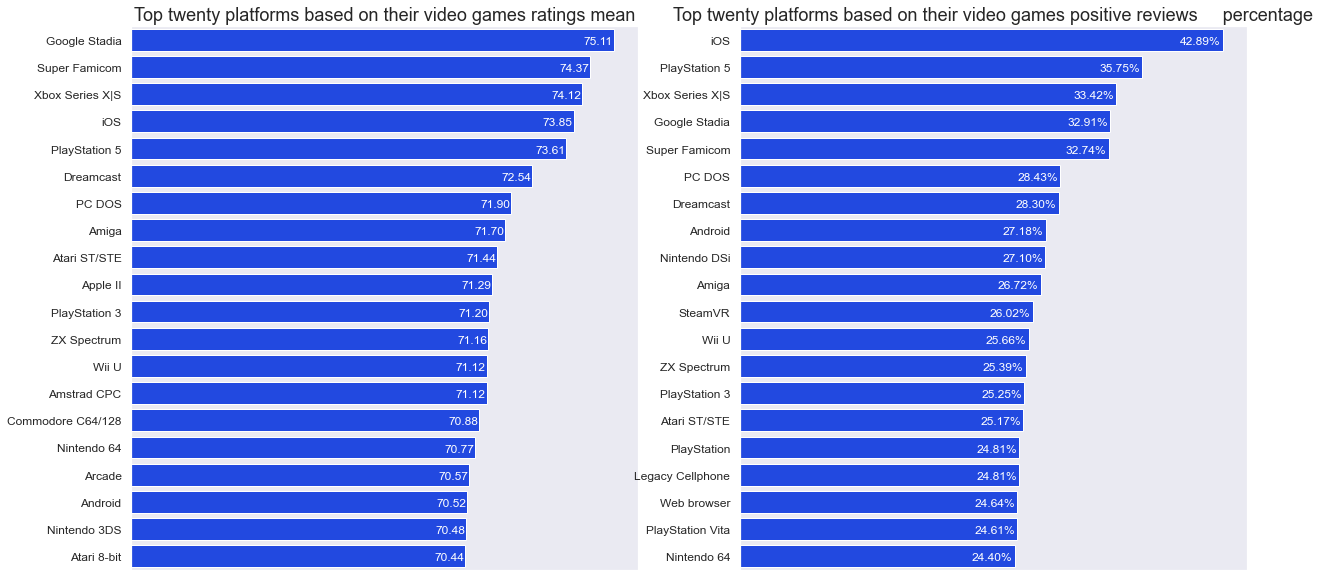

In [23]:
platforms_color = (3/255, 54/255, 255/255, 0.78)

plt.rcParams["figure.figsize"] = [20.00, 10]
f, axes = plt.subplots(1, 2)


# Left plot
sns.set_style("dark")
sns.set_theme()
# Barplot
aux = mean_rating_by_platform.head(20).copy()

max_val = int(aux.ratings_mean.max())

aux.ratings_mean = aux.ratings_mean - offset

top_twenty_platforms_by_ratings_mean = sns.barplot(
    data=aux, 
    x='ratings_mean',
    y='platform',
    color=platforms_color,
    orient = 'h',
    ax=axes[0]
)
top_twenty_platforms_by_ratings_mean.set_title(
    "Top twenty platforms based on their video games ratings mean", 
    fontsize = 18
)
top_twenty_platforms_by_ratings_mean.set_xlabel("")
top_twenty_platforms_by_ratings_mean.set_ylabel("")
top_twenty_platforms_by_ratings_mean.set_xticks([])
top_twenty_platforms_by_ratings_mean.set_yticklabels(
    top_twenty_platforms_by_ratings_mean.yaxis.get_ticklabels(), 
    size = 12
)

# Adding actual value to each bar
for i in range(len(mean_rating_by_platform.head(20))):
    value = mean_rating_by_platform.head(20).iloc[i,1]
    top_twenty_platforms_by_ratings_mean.text(value-offset-.5, 
                                              i+.15, 
                                              f'{str(value)[:5]}', 
                                              color='white', 
                                              ha="center", size=12
                                             )


sns.set_style("dark")
sns.set_theme()

top_twenty_platforms_by_positive_ratings = sns.barplot(
    data=platforms_ratings_df.head(20), 
    x='high_ratings_rate',
    y='platform',
    color=platforms_color,
    orient = 'h',
    ax = axes[1]
)

top_twenty_platforms_by_positive_ratings.set_title(
    "Top twenty platforms based on their video games positive reviews \
    percentage", 
    fontsize = 18)
top_twenty_platforms_by_positive_ratings.set_xlabel("")
top_twenty_platforms_by_positive_ratings.set_ylabel("")
top_twenty_platforms_by_positive_ratings.set_xticks([])
top_twenty_platforms_by_positive_ratings.set_yticklabels(
    top_twenty_platforms_by_positive_ratings.yaxis.get_ticklabels(), 
    size = 12)

# Adding actual value to each bar
for i in range(len(platforms_ratings_df.head(20))):
    value = platforms_ratings_df.head(20).iloc[i,3]
    top_twenty_platforms_by_positive_ratings.text(value-2, 
                                                  i+.15, 
                                                  f'{str(value)[:5]}%', 
                                                  color='white', 
                                                  ha="center",
                                                  fontsize=12
                                                 )

plt.savefig(f'{report_imgs_folder}/platforms_plot.png', bbox_inches='tight')
plt.show()

## Getting best rated family

It is well known **Nintendo**, **PlayStation** and **Xbox** are the kings of the video games consoles market. Which one is the best rated?

First we will get all the platforms for those families

In [24]:
families_consoles = platforms_df[
    platforms_df.platform_family.isin(
        ['Nintendo', 'PlayStation', 'Xbox']
    )
].drop_duplicates('platform')[['platform', 'platform_family']]
families_consoles.head(10)

,platform,platform_family
3,PlayStation 2,PlayStation
36,Family Computer Disk System,Nintendo
70,Virtual Boy,Nintendo
72,Nintendo Switch,Nintendo
79,Nintendo DSi,Nintendo
90,Xbox,Xbox
101,Game Boy Advance,Nintendo
110,Nintendo 64,Nintendo
115,Nintendo Entertainment System (NES),Nintendo
132,Wii U,Nintendo


Now, we will get all videogames from those consoles, `platform_family` will be added and we will drop all useless columns

In [25]:
games_by_family_console = games_df[
    games_df.platform.isin(families_consoles.platform)
].drop_duplicates(['name', 'platform'])
games_by_family = pd.merge(games_by_family_console, 
                           families_consoles, 
                           on='platform', 
                           how='left'
                          )
games_by_family = games_by_family[['name', 'platform_family', 'total_rating']]
games_by_family.head(10)

,name,platform_family,total_rating
0,Battle Chess,Nintendo,71.972950
1,Star Trek: Shattered Universe,PlayStation,55.000000
2,Star Trek: Shattered Universe,Xbox,55.000000
3,Asterix at the Olympic Games,Nintendo,57.977007
4,Asterix at the Olympic Games,PlayStation,57.977007
5,Asterix at the Olympic Games,Xbox,57.977007
6,Asterix at the Olympic Games,Nintendo,57.977007
7,Project: Snowblind,PlayStation,67.738413
8,Project: Snowblind,Xbox,67.738413
9,Goblin Commander: Unleash the Horde,PlayStation,62.500000


Now, we can compute mean rating for each family

In [26]:
mean_rating_by_family = games_by_family.groupby(
    'platform_family'
)['total_rating'].mean().to_frame().reset_index()
mean_rating_by_family.columns = ['platform_family', 'ratings_mean']
mean_rating_by_family = mean_rating_by_family.sort_values('ratings_mean', 
                                                          ascending=False)
mean_rating_by_family

,platform_family,ratings_mean
2,Xbox,70.102899
1,PlayStation,69.793292
0,Nintendo,68.314798


And, of course, we can compute high ratings rate for each family

In [27]:
# Games grouped by family and rating
family_and_rating = games_by_family.groupby(
    ['platform_family', 'total_rating']
).size().to_frame().reset_index()

# Getting all ratings by family
ratings_by_family = family_and_rating.loc[family_and_rating.index.repeat(
    family_and_rating[0]
)].reset_index(drop=True).iloc[:,:-1]

# Highest ratings are filterd
high_ratings_by_family = ratings_by_family[
    ratings_by_family.total_rating >= high_rating_threshold
].groupby('platform_family').size().to_frame().reset_index()
high_ratings_by_family.columns = ['platform_family', 'n_high_ratings']

# Total rating is obtained
total_ratings_by_family = ratings_by_family.groupby(
    'platform_family'
).size().to_frame().reset_index()
total_ratings_by_family.columns = ['platform_family', 'n_total_ratings']

# Both total and high ratings number are joined
families_ratings_df = pd.merge(total_ratings_by_family, 
                               high_ratings_by_family, 
                               on='platform_family'
                              )

# High ratings rate is computed
families_ratings_df['high_ratings_rate']=families_ratings_df.n_high_ratings*100/families_ratings_df.n_total_ratings
families_ratings_df = families_ratings_df.sort_values(
    'high_ratings_rate', 
    ascending=False
)
families_ratings_df

,platform_family,n_total_ratings,n_high_ratings,high_ratings_rate
2,Xbox,6943,1637,23.577704
1,PlayStation,11077,2558,23.092895
0,Nintendo,10835,2234,20.618366


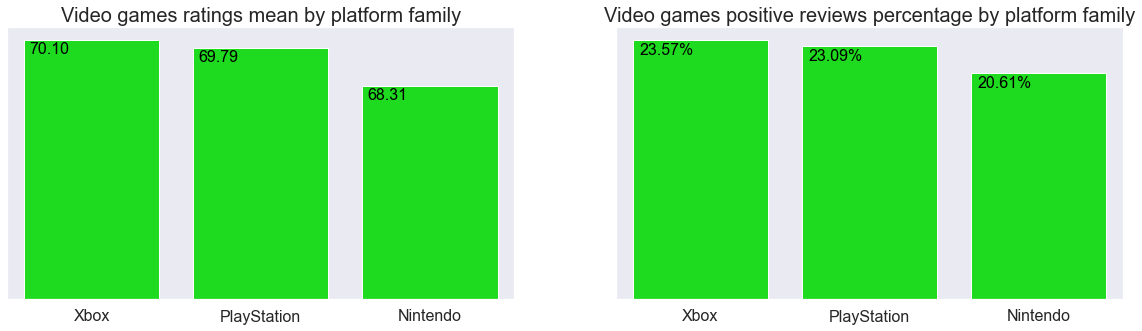

In [28]:
platform_families_color = (0, 250/255, 0, 0.65)

plt.rcParams["figure.figsize"] = [20.00, 5]
f, axes = plt.subplots(1, 2)

sns.set_style("dark")
sns.set_theme()
# Barplot
aux = mean_rating_by_family.copy()

max_val = int(aux.ratings_mean.max())

aux.ratings_mean = aux.ratings_mean - offset

vg_ratings_mean_by_family = sns.barplot(
    data=aux, 
    x='platform_family',
    y='ratings_mean',
    color=platform_families_color,
    ax=axes[0]
)
vg_ratings_mean_by_family.set_title(
    "Video games ratings mean by platform family", 
    fontsize = 20
)
vg_ratings_mean_by_family.set_xlabel("")
vg_ratings_mean_by_family.set_ylabel("")
vg_ratings_mean_by_family.set_yticks([])
vg_ratings_mean_by_family.set_xticklabels(
    vg_ratings_mean_by_family.xaxis.get_ticklabels(), 
    size = 16
)

# Adding actual value to each bar
for i in range(len(aux)):
    value = mean_rating_by_family.iloc[i,1]
    vg_ratings_mean_by_family.text(i-.25, 
                                   value-offset-.5, 
                                   f'{str(value)[:5]}', 
                                   color='black', 
                                   ha="center", 
                                   size = 16
                                  )


sns.set_style("dark")
sns.set_theme()

vg_positive_reviews_by_family = sns.barplot(
    data=families_ratings_df, 
    x='platform_family',
    y='high_ratings_rate',
    color=platform_families_color,
    ax=axes[1]
)

vg_positive_reviews_by_family.set_title(
    "Video games positive reviews percentage by platform family", 
    fontsize = 20
)
vg_positive_reviews_by_family.set_xlabel("")
vg_positive_reviews_by_family.set_ylabel("")
vg_positive_reviews_by_family.set_yticks([])
vg_positive_reviews_by_family.set_xticklabels(
    vg_positive_reviews_by_family.xaxis.get_ticklabels(), 
    size = 16
)

# Adding actual value to each bar
for i in range(len(families_ratings_df)):
    value = families_ratings_df.iloc[i,3]
    vg_positive_reviews_by_family.text(i-.2, 
                                       value-1.3, 
                                       f'{str(value)[:5]}%', 
                                       color='black', 
                                       ha="center", 
                                       fontsize = 16
                                      )

plt.savefig(f'{report_imgs_folder}/families_plot.png', bbox_inches='tight')
plt.show()

## Generating PDF report

Once we have all desired results, a simple pdf report will be automatically generated.

In [29]:
problem_statement = "The video game industry is one of the most profitable industries worldwide; in fact, \
in 2020 video games generated more revenue in the United States than movies and sports combined; however, \
money is not everything.\n\n\
In this industry, profits are the harvests for provide enjoyable game experiences to the users which is something very \
complex to achieve since many factors are involved such as history plot, characters development, balanced difficulty, \
art design, creative game mechanics, etc. Therefore, video games creators must be aware about the reception of their \
products because their success depends on it, both financially and in terms of prestige. The way players can feedback is \
reviewing and scoring the games on official web sites.\n\n\
The aim of this work is to analyze video games reviews to know which video game genres tend to be well \
received, as well as to find out which video games platforms and families are the most successful in terms of users satisfaction.\n\n\
Data about platforms and videogames will be retrieved from IGDB using its API."

results_info = f"Reviews were analyzed grouping video games by genre, platform and platform families. When platforms were taken into account,\
 only those with 100 games or more were considered. A review is a \"positive review\" if it is greater than or equal to {high_rating_threshold}."


In [30]:
pdf = FPDF('P', 'mm', 'A4')

pdf.set_left_margin(0)
pdf.set_right_margin(0)

pdf.add_page()
pdf.set_font('Times', 'B', 18)
pdf.cell(210, 10, 'Video Games Reviews Report', 0, 1, 'C')
pdf.ln(3)
pdf.set_font('Times', '', 15)
pdf.cell(210, 10, 'Pedro Andrés Hernández Amador', 0, 1, 'C')
today_date = date.today()
pdf.cell(210, 10,today_date.strftime("%m/%d/%Y"), 0, 1, 'C')

pdf.ln(10)

pdf.set_font('Times', 'B', 12)
pdf.cell(210, 10, 'Problem Statement', 0, 1, 'L')

pdf.set_font('Times', '', 10)
pdf.multi_cell(0, 4, problem_statement)

pdf.ln(10)
pdf.set_font('Times', 'B', 12)
pdf.cell(210, 10, 'Results', 0, 1, 'L')
pdf.ln(0)
pdf.set_font('Times', '', 10)
pdf.multi_cell(0, 4, results_info, 0, 1, 'L')
pdf.ln(5)

pdf.image('./report/imgs/video_games_ratings_mean_by_genre.png', w=210, h=125)
pdf.ln(10)
pdf.image('./report/imgs/video_games_positive_reviews_percentage_by_genre.png', 
          w=210, 
          h=125
)
pdf.ln(10)
pdf.image('./report/imgs/platforms_plot.png', w=210, h=100)
pdf.ln(10)
pdf.image('./report/imgs/families_plot.png', w=210, h=70)


pdf.output(f'{report_folder}/report_{today_date.strftime("%m-%d-%Y")}.pdf', 'F')

''